<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/ARIMA_GRID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PACKAGES INSTALLING*

In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 15.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


*IMPORT PACKAES*

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

*DATA LOADING*

In [3]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

*GROUPING THE DATA AND FILLING THE EMPTY VALUES BY MEDIAN*

In [4]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


*HERE THE PLOT*

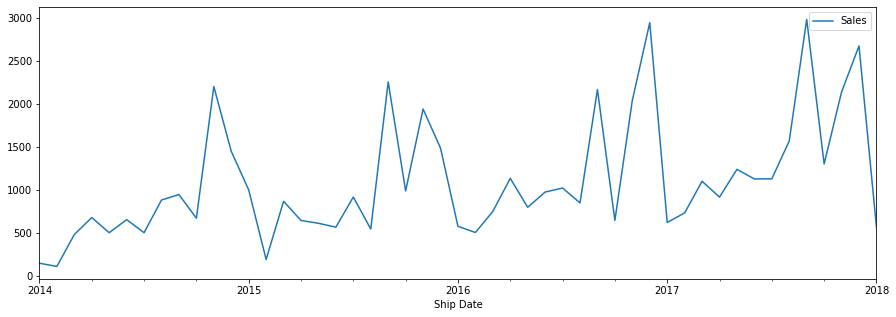

In [5]:
data1.plot(figsize=(15,5))
plt.show()

*INTIALING THE HYPER PARAMETERS*

In [6]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [7]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

*APPLYING GRID SEARCH TO FIND BETTER HYPERPARAMETERS*

In [8]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(data1, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
343.9431159320116
(1, 1, 1)
(1, 1, 0, 12)


*HERE THE MODEL BULIDING AND FITTING*

In [9]:
model = sm.tsa.statespace.SARIMAX(data1, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -167.972
Date:                            Wed, 08 Jun 2022   AIC                            343.943
Time:                                    04:55:54   BIC                            348.485
Sample:                                01-01-2014   HQIC                           345.085
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4102      0.277     -1.482      0.138      -0.953       0.132
ma.L1         -0.9987     11.014     -0.091      0.928     -22.585      20.587
ar.S.L12      -0.6179      0.207     -2.985      0.003      -1.024      -0.212
sigma2      1.171e+05   1.28e+06      0.092      0.927   -2.38e+06    2.62e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.91
Prob(Q):                               nan   Prob(JB):                         0.05
Heteroskedasticity (H):               3.58   Skew:                             1.04
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*HERE THE PREDICTIONS*

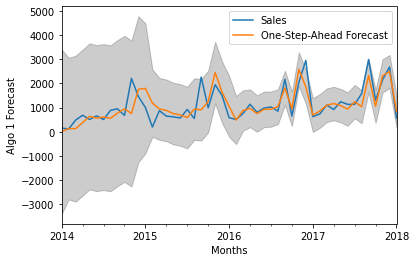

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()